<a href="https://colab.research.google.com/github/TobyDrane/Applied-Machine-Learning/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A playground for Convolutional Neural Networks

In [16]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')

## Fashion-MNIST

Explore the use of a basic CNN to predict the images from the classic Fashion-MNIST dataset.

### Load Dataset


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Since each image has a mapping to it's category but that label is currently in 
# numerical form, we need to perform the mapping to that at their class name
label_classes = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Print the shape of the train dataset
print('TRAIN IMAGE SIZE ->', train_images.shape)
print('TRAIN IMAGE CLASS SIZE ->', test_labels.shape)

# Print the shape of the test dataset
print('TEST IMAGE SIZE ->', test_images.shape)
print('TEST IMAGE CLASS SIZE ->', test_labels.shape)
print('\n\n')

# Print the how many images of each class we have
def show_class_distribution(data):
  class_counts = np.zeros(9)
  total_size = data.shape[0]

  for i in range(class_counts.shape[0]):
    class_counts[i] = np.count_nonzero(data == i)
    percentage = (class_counts[i] / total_size) * 100
    label = label_classes[i]
    print('{:<20s}:   {} or {}%'.format(label, class_counts[i], percentage))

show_class_distribution(train_labels)

TRAIN IMAGE SIZE -> (60000, 28, 28)
TRAIN IMAGE CLASS SIZE -> (10000,)
TEST IMAGE SIZE -> (10000, 28, 28)
TEST IMAGE CLASS SIZE -> (10000,)



T-shirt/top         :   6000.0 or 10.0%
Trouser             :   6000.0 or 10.0%
Pullover            :   6000.0 or 10.0%
Dress               :   6000.0 or 10.0%
Coat                :   6000.0 or 10.0%
Sandal              :   6000.0 or 10.0%
Shirt               :   6000.0 or 10.0%
Sneaker             :   6000.0 or 10.0%
Bag                 :   6000.0 or 10.0%


We currently have an issue with our images being in the pixel value range 0 to 255. Our model requires the images to be scaled to a value in the range of 0 to 1 before feeding them. Thus normalize the images.

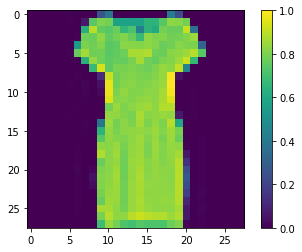

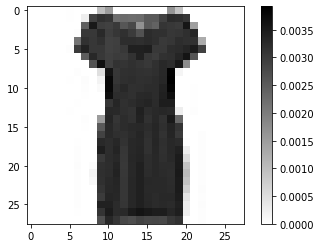

In [17]:
# Plot a single image
def plot_single_image(image, to_grayscale = True):
  plt.figure()
  if to_grayscale:
    plt.imshow(image, cmap=plt.cm.binary)
  else:
    plt.imshow(image)
  plt.colorbar()
  plt.grid(False)
  plt.show()

# Show the original image
plot_single_image(train_images[20], to_grayscale = False)

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Now show same image but hopefully normalized
plot_single_image(train_images[20])

### Build the CNN Model

Okay so we are now good to go and build the actual CNN model. The structure of the network is described below:

1. Conv2D:
  * Filters = 64
  * Kernel size = 7 x 7
  * Stride = 1
  * Activation = ReLU
  * Input shape 28 x 28 x 1
2. MaxPooling2D:
  * Pool Size = 2 x 2 (downscales the image by a factor of 2)
3. Conv2D:
  * Filters = 128
  * Kernl size = 3 x 3
  * Activation = ReLU
4. Conv2D:
  * Filters = 128
  * Kernl size = 3 x 3
  * Activation = ReLU
5. MaxPooling2D:
  * Pool Size = 2 x 2
6. Conv2D:
  * Filters = 256
  * Kernl size = 3 x 3
  * Activation = ReLU
7. Conv2D:
  * Filters = 256
  * Kernl size = 3 x 3
  * Activation = ReLU
8. MaxPooling2D:
  * Pool Size = 2 x 2
9. Flatten: This flattens the output of the CNN layers before from the 2D shape to a 1D shape that is required for the MLP to come next
10. Dense: First layer of our fully connected network to retrieve the output
  * Neurons = 128
  * Activation = ReLU
11. Dense:
  * Neurons = 64
  * Activation = ReLU
12. Dense:
  * Neurons = 10
  * Activation = SoftMax


In [5]:
def create_CNN_model():
  # Create the model
  model = Sequential([
    Conv2D(64, kernel_size=(7, 7), activation='relu', input_shape=[28, 28, 1], padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
  ])

  return model

In [6]:
model = create_CNN_model()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

# Check the model was created properly
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

### Train the model with training data

In [9]:
# Handle some data pre-processing
# First need to reshape into (n, 28, 28, 1) that is required for the CNN
def reshape_input(data):
  shape = data.shape
  ns = shape[0]
  rows = shape[1]
  cols = shape[2]

  return data.reshape(ns, rows, cols, 1)

def reshape_input_labels(data):
  number_classes = 10
  return tf.keras.utils.to_categorical(data, number_classes)

X = reshape_input(train_images)
Y = reshape_input_labels(train_labels)
X_test = reshape_input(test_images)
Y_test = reshape_input_labels(test_labels)

# Now split into a validation and test set
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_val.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


In [8]:
EPOCHS = 50

trained_model = model.fit(
    X_train,
    Y_train,
    validation_data = (X_val, Y_val),
    batch_size = 128,
    epochs = EPOCHS,
    verbose=1
  )

Epoch 1/50
375/375 [==============================] - 12s 23ms/step - loss: 1.3225 - accuracy: 0.5224 - val_loss: 0.4591 - val_accuracy: 0.8421
Epoch 2/50
375/375 [==============================] - 8s 22ms/step - loss: 0.5274 - accuracy: 0.8171 - val_loss: 0.3670 - val_accuracy: 0.8677
Epoch 3/50
375/375 [==============================] - 8s 22ms/step - loss: 0.4168 - accuracy: 0.8585 - val_loss: 0.3119 - val_accuracy: 0.8797
Epoch 4/50
375/375 [==============================] - 8s 22ms/step - loss: 0.3590 - accuracy: 0.8770 - val_loss: 0.2922 - val_accuracy: 0.8971
Epoch 5/50
375/375 [==============================] - 8s 22ms/step - loss: 0.3251 - accuracy: 0.8884 - val_loss: 0.2774 - val_accuracy: 0.8991
Epoch 6/50
375/375 [==============================] - 8s 22ms/step - loss: 0.2922 - accuracy: 0.9014 - val_loss: 0.2624 - val_accuracy: 0.9082
Epoch 7/50
375/375 [==============================] - 8s 22ms/step - loss: 0.2841 - accuracy: 0.9056 - val_loss: 0.2581 - val_accuracy: 0.907

### Test the model with testing data


In [10]:
# Test the model
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6488592028617859
Test accuracy: 0.9085999727249146


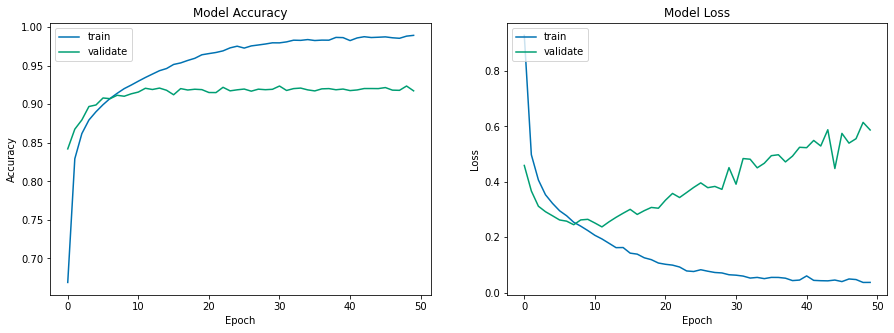

In [18]:
def plot_model_loss_accuracy(model):
  history = model.history

  fig, axs = plt.subplots(1,2,figsize=(15,5)) 

  # Model accuracy  
  axs[0].plot(history['accuracy']) 
  axs[0].plot(history['val_accuracy']) 
  axs[0].set_title('Model Accuracy')
  axs[0].set_ylabel('Accuracy') 
  axs[0].set_xlabel('Epoch')
  axs[0].legend(['train', 'validate'], loc='upper left')
  
  # Model loss
  axs[1].plot(history['loss']) 
  axs[1].plot(history['val_loss']) 
  axs[1].set_title('Model Loss')
  axs[1].set_ylabel('Loss') 
  axs[1].set_xlabel('Epoch')
  axs[1].legend(['train', 'validate'], loc='upper left')

  plt.show()

# Plot
plot_model_loss_accuracy(trained_model)